# ¡Hola David! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David excelente trabajo completando este proyecto. Has demostrado habilidades destacables en análisis exploratorio y visualización efectiva de datos. Además, tu capacidad para formular y verificar hipótesis estadísticas fue sólida y precisa, mostrando un fuerte dominio en el análisis crítico necesario para la toma de decisiones estratégicas. En general, desarrollaste un muy buen análisis en este caso de estudio, sigue manteniendo esta combinación de habilidades técnicas, analíticas y estratégicas en tus futuros proyectos.

¡Te deseo muchos éxitos en tu próximo Sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ANALISIS DE TIENDA ONLINE ICE

Este proyecto analiza datos de ventas, plataformas, géneros, calificaciones y clasificaciones ESRB de videojuegos para identificar patrones que predicen su éxito y apoyar decisiones de marketing y desarrollo para 2017.

In [61]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info`, `describe` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. 

</div>

## LIMPIEZA DE LOS DATOS

In [62]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [63]:
# Convertir 'year_of_release' a enteros.
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convertir 'user_score' a numérico.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

print(df.dtypes)


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


Se convirtieron las columnas a tipos de datos adecuados: year_of_release pasó de float a Int para reflejar años; user_score de object a float para análisis numérico; y se crearon global_sales y success para analizar ventas totales y clasificar juegos exitosos.

In [64]:
# Eliminar filas con nulos
df = df.dropna(subset=['name', 'year_of_release', 'genre'])

# Rellenar nulos en 'rating' con 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

print(df.isnull().sum())


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


Se eliminaron los valores nulos de name, year_of_release y genre porque son datos esenciales para el análisis. Los valores nulos de rating se llenaron como 'Unknown', ya que no contar con la clasificación no impide analizar otros aspectos del juego. Los valores nulos de critic_score y user_score se dejaron en blanco, ya que la falta de reseñas podría deberse a que el juego no fue evaluado y rellenarlos afectaría el análisis.

Los valores 'tbd' en user_score indican que la calificación aún no está disponible, por lo que se trataron como valores faltantes. No se reemplazaron para evitar distorsionar el análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy bien, tu proceso de limpieza está bien enfocado. Cambias adecuadamente los nombres de columnas, conviertes tipos de datos importantes como *year_of_release* y *user_score*, y eliminas registros nulos en campos clave. El uso de 'Unknown' para rellenar valores faltantes en rating también es una estrategia válida.

</div>

# ANÁLISIS

### VENTAS TOTALES

In [65]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df[['name', 'global_sales']].head(10)

,name,global_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.91
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


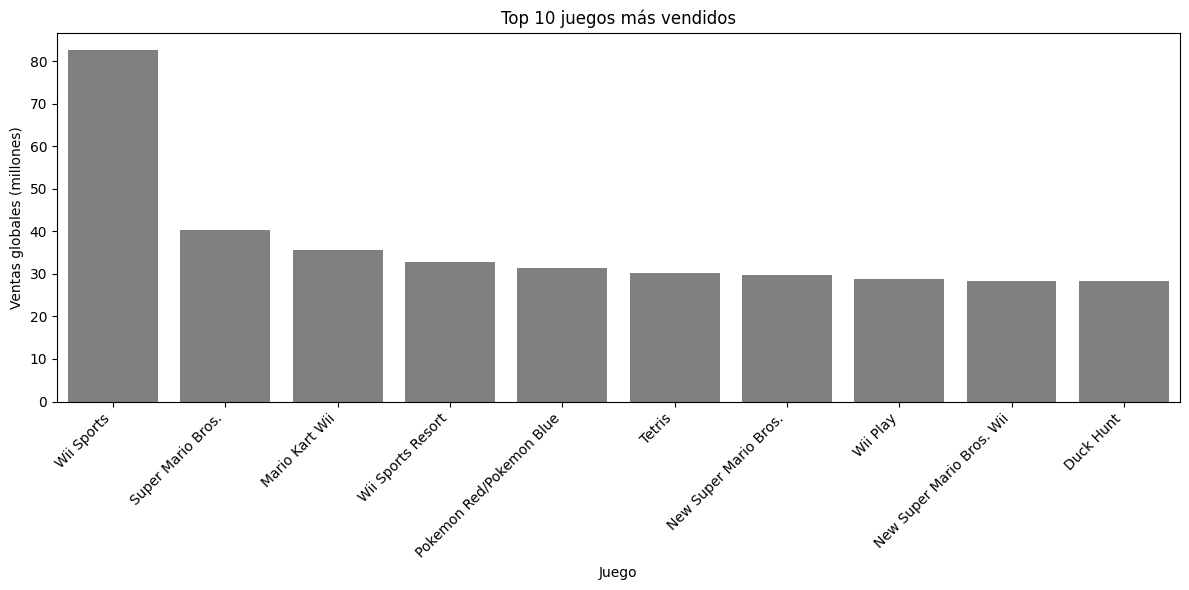

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar top 10 juegos con más ventas
top_10 = df.sort_values(by='global_sales', ascending=False).head(10)

# Gráfica de barras verticales con estilo neutro
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='name', y='global_sales', color='gray')  # color neutro
plt.title('Top 10 juegos más vendidos')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Los resultados reflejan cómo las franquicias establecidas y las plataformas con alta base de usuarios tienden a generar mayores ingresos a nivel mundial.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David buen trabajo identificando el top de juegos

</div>

### JUEGOS LANZADOS EN DIFERENTES AÑOS

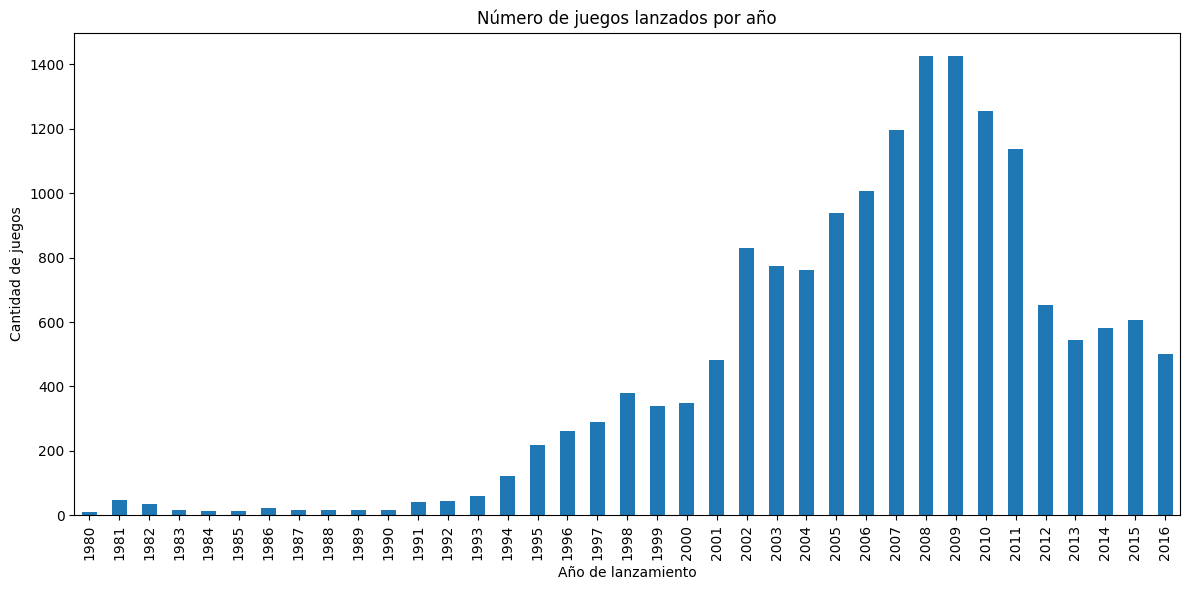

In [67]:
# Contar juegos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.tight_layout()
plt.show()


La gráfica muestra un crecimiento sostenido en el número de lanzamientos de videojuegos desde el año 2000, con un pico entre 2008 y 2011. Esto indica que esos años son los más representativos para el análisis. En cambio, los datos de años anteriores a 2000 y del 2016 no son tan fiables, ya sea por escasez de registros o por estar incompletos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has identificado con claridad el periodo más representativo para el análisis, basándote en la consistencia y volumen de los datos disponibles. 

</div>

### VENTAS POR PLATAFORMAS

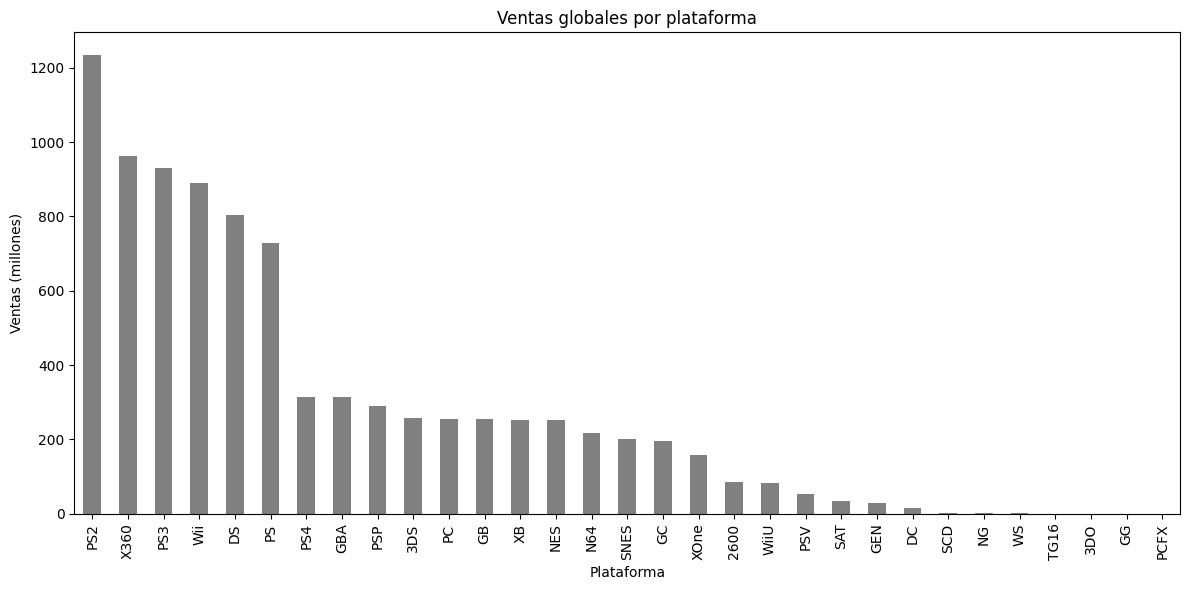

In [68]:
platform_sales = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
platform_sales.plot(kind='bar', color='gray')
plt.title('Ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.tight_layout()
plt.show()


### PLATAFORMAS QUE MÁS VENDEN

<Figure size 1400x800 with 0 Axes>

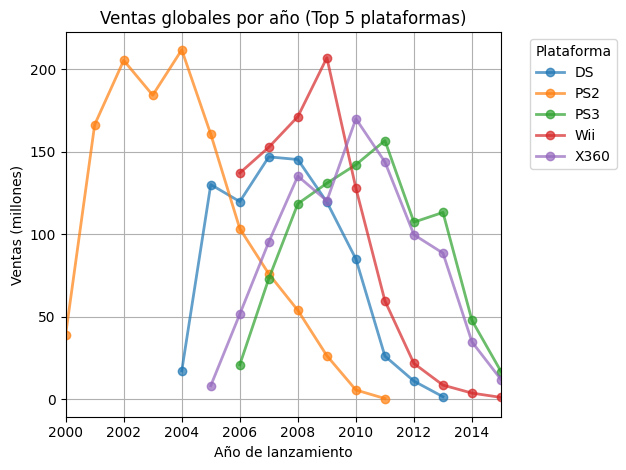

In [69]:

top_platforms = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(5).index
top_df = df[df['platform'].isin(top_platforms)]
platform_year_sales = top_df.groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack()

plt.figure(figsize=(14,8))
platform_year_sales.plot(kind='line', marker='o', linewidth=2, alpha=0.7)
plt.title('Ventas globales por año (Top 5 plataformas)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas (millones)')
plt.xlim(2000, 2015)
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



La gráfica muestra que cada plataforma tiene un ciclo de vida claro, con un pico de ventas concentrado en ciertos años. La PS2 dominó entre 2001 y 2006, mientras que DS, Wii, PS3 y Xbox 360 alcanzaron su punto máximo entre 2007 y 2012. Esto indica que las plataformas tienen un periodo de mayor rentabilidad que debe aprovecharse estratégicamente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

David has interpretado correctamente el comportamiento cíclico de las plataformas, resaltando cómo cada una atraviesa una fase de máximo rendimiento que puede ser clave para las decisiones comerciales.

</div>

### PLATAFORMAS QUE MENOS VENDEN

In [70]:
last_year = df.groupby('platform')['year_of_release'].max()
total_sales = df.groupby('platform')['global_sales'].sum()
platform_status = pd.DataFrame({
    'last_year': last_year,
    'total_sales': total_sales
})
platform_status = platform_status.sort_values(by='total_sales', ascending=False)
inactive_platforms = platform_status[platform_status['last_year'] < 2014]


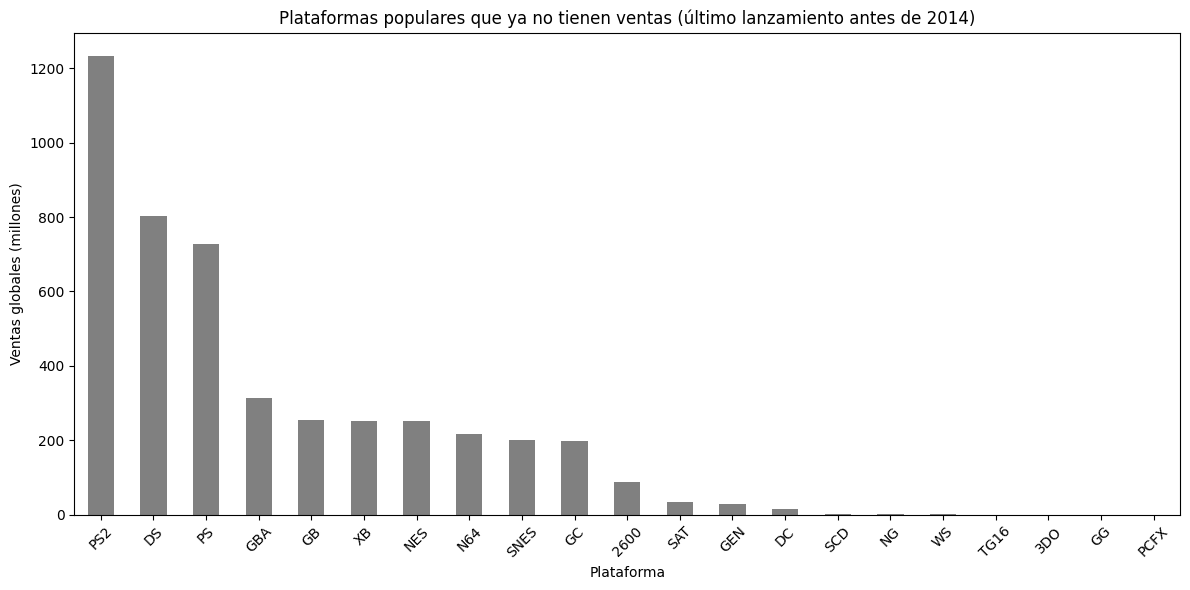

In [71]:

plt.figure(figsize=(12,6))
inactive_platforms.sort_values(by='total_sales', ascending=False)['total_sales'].plot(kind='bar', color='gray')
plt.title('Plataformas populares que ya no tienen ventas (último lanzamiento antes de 2014)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El éxito de una plataforma no solo depende del momento de lanzamiento, sino de su adopción global, catálogo de juegos, y soporte prolongado. Las consolas con baja penetración tienden a desaparecer rápidamente y a generar ventas insignificantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis amplía la perspectiva al ir más allá de la fecha de lanzamiento y considerar variables clave como el catálogo de juegos, el alcance en el mercado y la duración del soporte. Buen trabajo!

</div>

### VIDA DE UNA PLATAFORMA

In [72]:
platform_lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
platform_lifespan = platform_lifespan.sort_values(by='lifespan', ascending=False)
print(platform_lifespan)


           min   max  lifespan
platform                      
PC        1985  2016        31
DS        1985  2013        28
GB        1988  2001        13
X360      2005  2016        11
PSP       2004  2015        11
PS2       2000  2011        11
NES       1983  1994        11
DC        1998  2008        10
Wii       2006  2016        10
PS3       2006  2016        10
2600      1980  1989         9
SNES      1990  1999         9
PS        1994  2003         9
XB        2000  2008         8
GBA       2000  2007         7
GC        2001  2007         6
N64       1996  2002         6
3DS       2011  2016         5
PSV       2011  2016         5
SAT       1994  1999         5
WiiU      2012  2016         4
GEN       1990  1994         4
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
TG16      1995  1995         0
PCFX      1996  1996         0
GG      

Las plataformas exitosas suelen durar de 8 a 11 años, mientras que las menos populares desaparecen en menos de 4 años. Este análisis ayuda a entender cuándo enfocar campañas publicitarias o retirar soporte para una consola.

### MODELO PREDICTIVO

Usar datos de 2000 a 2015 garantiza una base robusta, actual y representativa para predecir qué juegos podrían tener éxito en 2017.

In [73]:
df_model = df[(df['year_of_release'] >= 2000) & (df['year_of_release'] <= 2015)]


In [74]:
platform_sales = df_model.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
print(platform_sales)


platform
PS2     1233.56
X360     959.72
PS3      927.74
Wii      891.00
DS       802.76
GBA      312.88
PSP      289.53
XB       251.57
PS4      244.89
3DS      242.67
PC       200.47
GC       196.73
PS       140.70
XOne     133.17
WiiU      77.59
PSV       49.56
N64       37.30
GB        29.00
DC         7.41
WS         0.96
Name: global_sales, dtype: float64


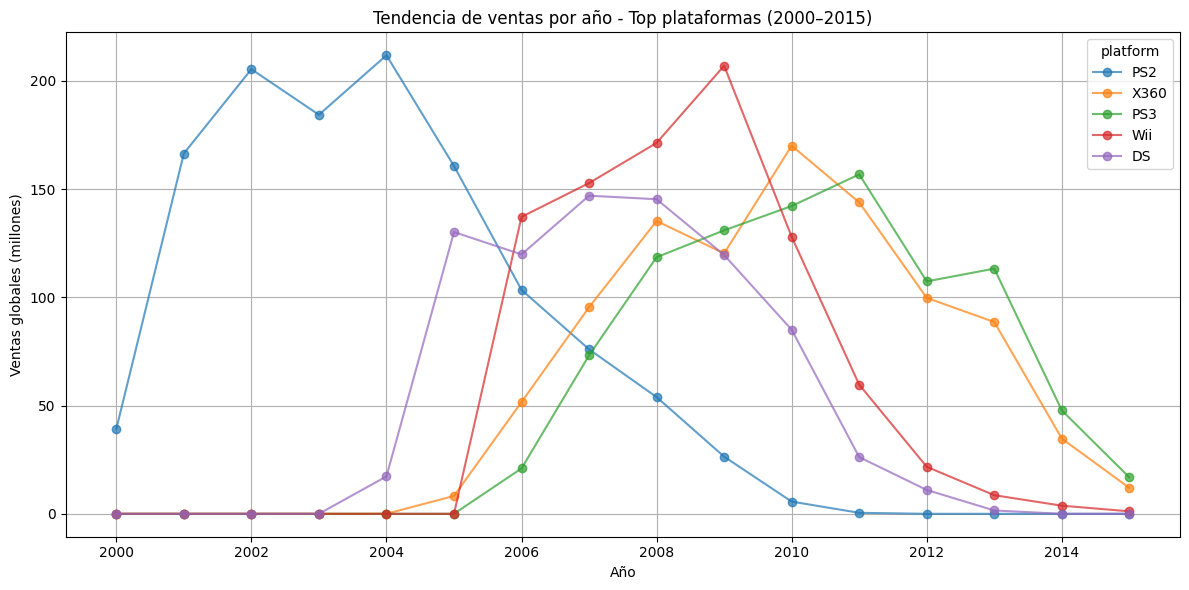

In [75]:
platform_trend = df_model.groupby(['year_of_release', 'platform'])['global_sales'].sum().unstack().fillna(0)

top_platforms = platform_sales.head(5).index
platform_trend[top_platforms].plot(figsize=(12,6), marker='o', alpha=0.7)
plt.title('Tendencia de ventas por año - Top plataformas (2000–2015)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()


Las plataformas líderes en ventas entre 2000 y 2015 fueron PS2, X360, PS3, Wii y DS, aunque para 2015 ya mostraban un claro declive. En contraste, PS4, Xbox One y 3DS registraban un crecimiento reciente, lo que las convierte en las opciones más rentables para enfocar campañas y lanzar nuevos juegos en 2017.

### Distribución de ventas globales por plataforma

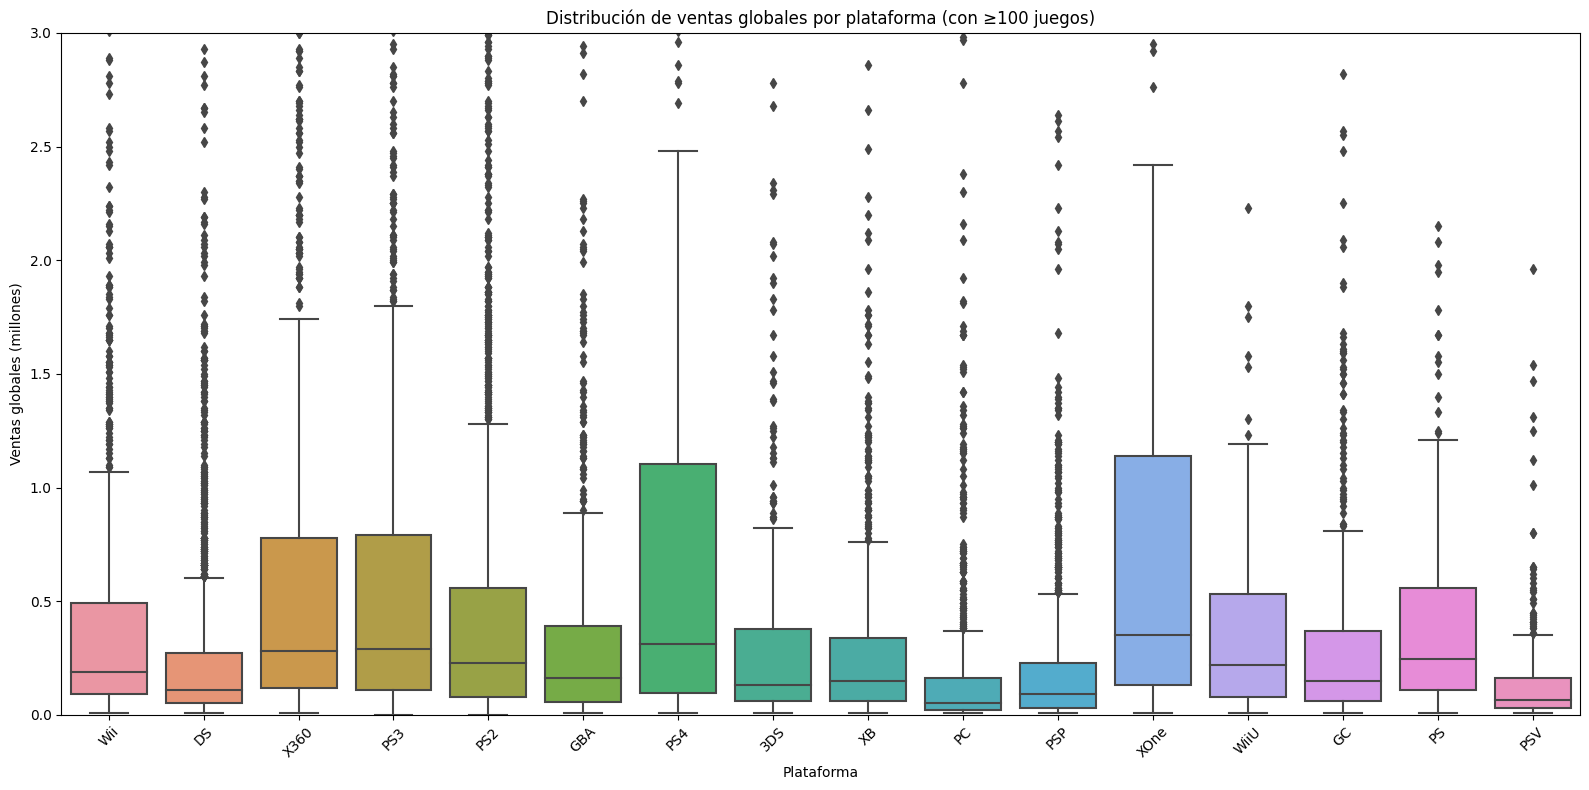

In [76]:
platform_counts = df_model['platform'].value_counts()
valid_platforms = platform_counts[platform_counts >= 100].index
filtered_df = df_model[df_model['platform'].isin(valid_platforms)]

plt.figure(figsize=(16,8))
sns.boxplot(data=filtered_df, x='platform', y='global_sales')
plt.title('Distribución de ventas globales por plataforma (con ≥100 juegos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.ylim(0, 3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



La mayoría de las plataformas tienen ventas medianas bajas, pero PS4 y XOne destacan con ventas promedio más altas y mayor presencia de juegos exitosos. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo obteniendo los *box-plot*. Estos muestran que la mayoría de los juegos tienen ventas bajas, hay valores extremos que dominan en cada plataforma. Esto muestra que el éxito de un juego no depende solo de la consola, sino también de su popularidad y estrategia de marketing.

</div>

### IMPACTO DE LAS RESEÑAS

In [77]:
wii_df = df[(df['platform'] == 'Wii') & 
            (df['user_score'].notna()) & 
            (df['critic_score'].notna())]

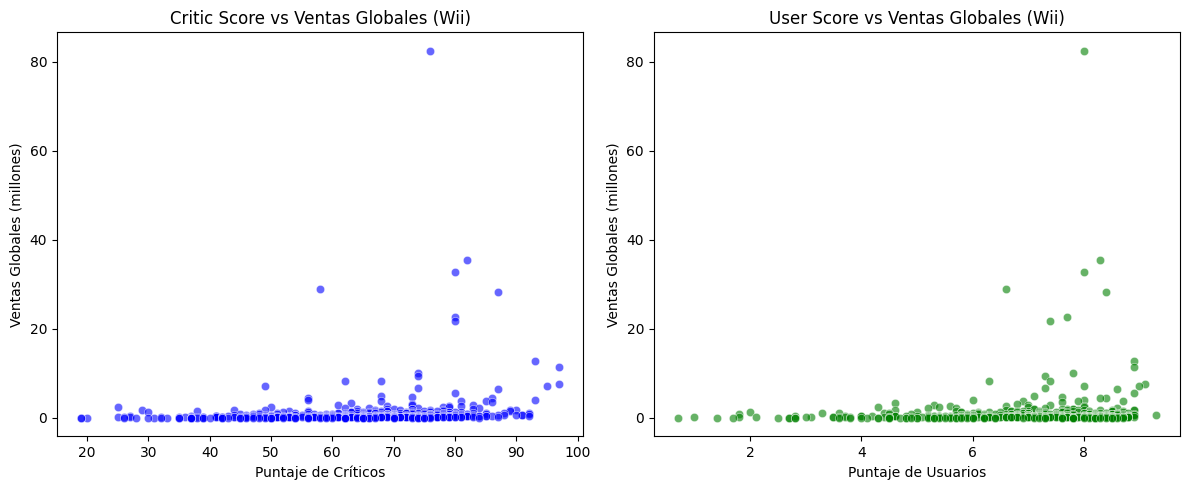

              critic_score  user_score  global_sales
critic_score      1.000000    0.688285      0.170855
user_score        0.688285    1.000000      0.110637
global_sales      0.170855    0.110637      1.000000


In [79]:
wii_df.loc[:, 'user_score'] = pd.to_numeric(wii_df['user_score'], errors='coerce')
wii_df = wii_df.dropna(subset=['user_score'])  # eliminar si quedaron 'tbd' como NaN

# Gráfico de dispersión: Critic Score vs Global Sales
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=wii_df, x='critic_score', y='global_sales', color='blue', alpha=0.6)
plt.title('Critic Score vs Ventas Globales (Wii)')
plt.xlabel('Puntaje de Críticos')
plt.ylabel('Ventas Globales (millones)')

# Gráfico de dispersión: User Score vs Global Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=wii_df, x='user_score', y='global_sales', color='green', alpha=0.6)
plt.title('User Score vs Ventas Globales (Wii)')
plt.xlabel('Puntaje de Usuarios')
plt.ylabel('Ventas Globales (millones)')

plt.tight_layout()
plt.show()

# Correlaciones
correlations = wii_df[['critic_score', 'user_score', 'global_sales']].corr()
print(correlations)

Para juegos de Wii, las calificaciones de críticos tienen un leve impacto en las ventas, pero las de usuarios casi ninguno.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, Con esta información se evidencia que la puntuación de los críticos está un poco más relacionada con las ventas que la de los usuarios, aunque la correlación es débil. En User_Score no hay una tendencia clara, pero en Critic_Score, los juegos mejor calificados tienden a vender más. Esto sugiere que las críticas especializadas pueden tener mayor impacto en las ventas.

</div>

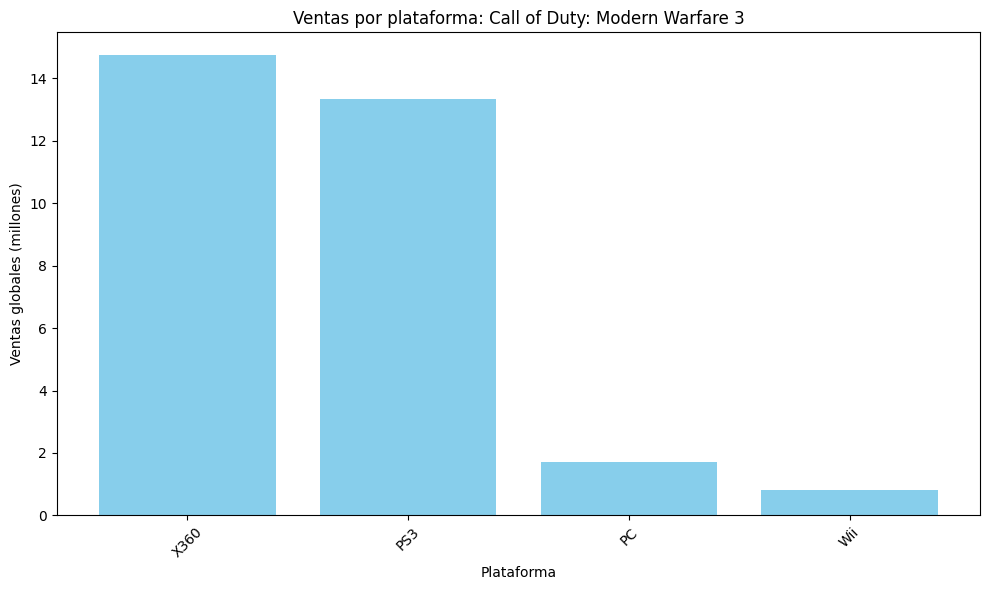

In [84]:
juego = "Call of Duty: Modern Warfare 3"  # puedes cambiar este nombre

# Filtrar ventas del juego por plataforma
ventas_juego = multi_df[multi_df['name'] == juego][['platform', 'global_sales']]

# Graficar
plt.figure(figsize=(10,6))
plt.bar(ventas_juego['platform'], ventas_juego['global_sales'], color='skyblue')
plt.title(f'Ventas por plataforma: {juego}')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El gráfico destaca la importancia de elegir bien dónde lanzar un título.

### Ventas por género

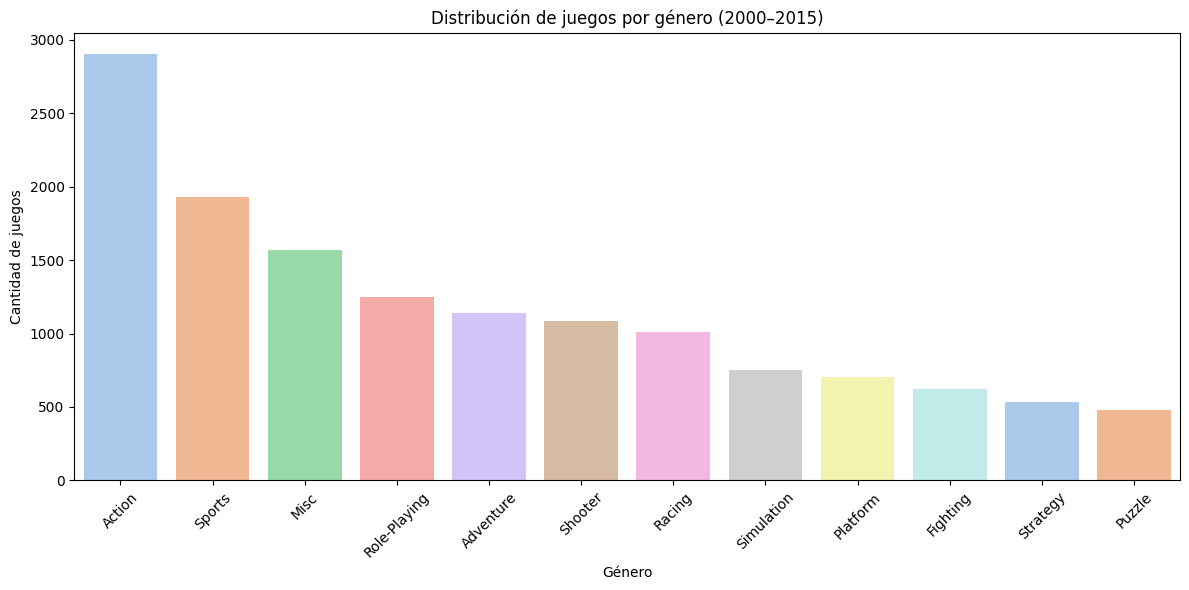

In [85]:
genre_counts = df_model['genre'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='pastel')
plt.title('Distribución de juegos por género (2000–2015)')
plt.xlabel('Género')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Géneros como Shooter y Sports suelen destacar en ventas totales debido a franquicias exitosas (Call of Duty, FIFA). Géneros como Puzzle, Strategy y Fighting tienen menor presencia, lo que puede indicar mercados más nicho o menor desarrollo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo David! Se ve claramente que los juegos de acción y deportes lideran en ventas. Los géneros de rol y deportes también destacan, aunque en menor medida. En cambio, los de estrategia, aventura y puzzle muestran ventas más bajas, lo que indica una demanda más limitada.

</div>

## Perfiles regionales para América del Norte (NA), Europa (EU) y Japón (JP).

### Plataformas

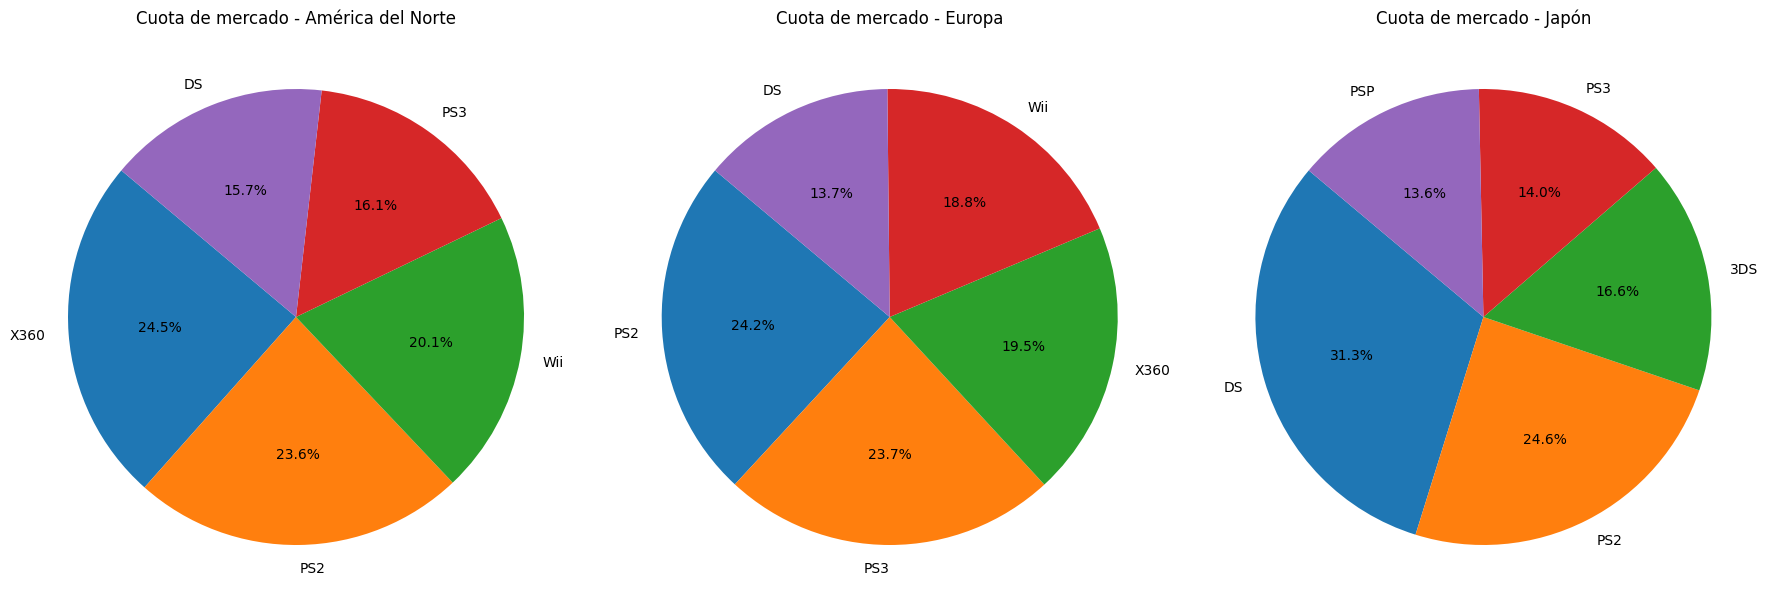

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].pie(top5_na, labels=top5_na.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Cuota de mercado - América del Norte')

axes[1].pie(top5_eu, labels=top5_eu.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Cuota de mercado - Europa')

axes[2].pie(top5_jp, labels=top5_jp.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Cuota de mercado - Japón')

plt.tight_layout()
plt.show()


 Xbox prácticamente no figura en Japón, lo que resalta diferencias culturales y de mercado en la preferencia por consolas.

### Géneros

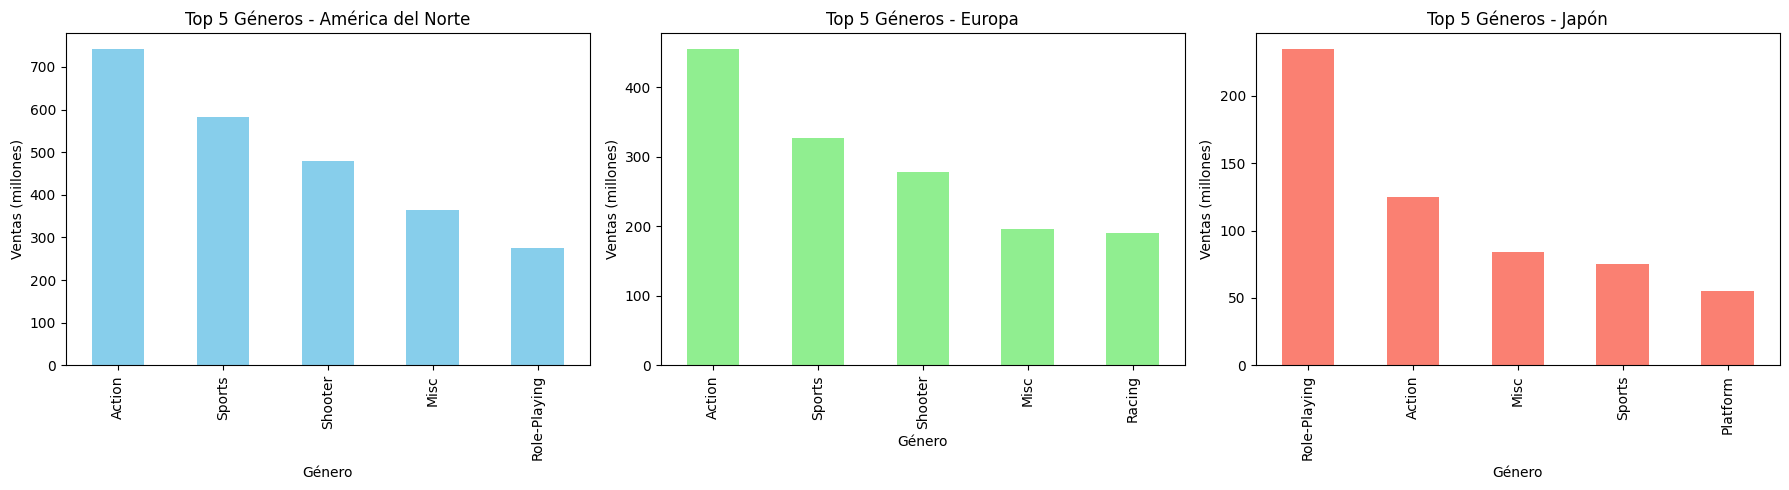

In [93]:
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
top5_na_genres.plot(kind='bar', color='skyblue')
plt.title('Top 5 Géneros - América del Norte')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 2)
top5_eu_genres.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Géneros - Europa')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.subplot(1, 3, 3)
top5_jp_genres.plot(kind='bar', color='salmon')
plt.title('Top 5 Géneros - Japón')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

América del Norte y Europa comparten preferencia por Action, Sports y Shooter, reflejando un gusto por juegos dinámicos y competitivos. Japón se destaca por el dominio del género Role-Playing, mostrando un fuerte gusto cultural por juegos narrativos y de aventura.

### CLASIFICACIONES ESBR

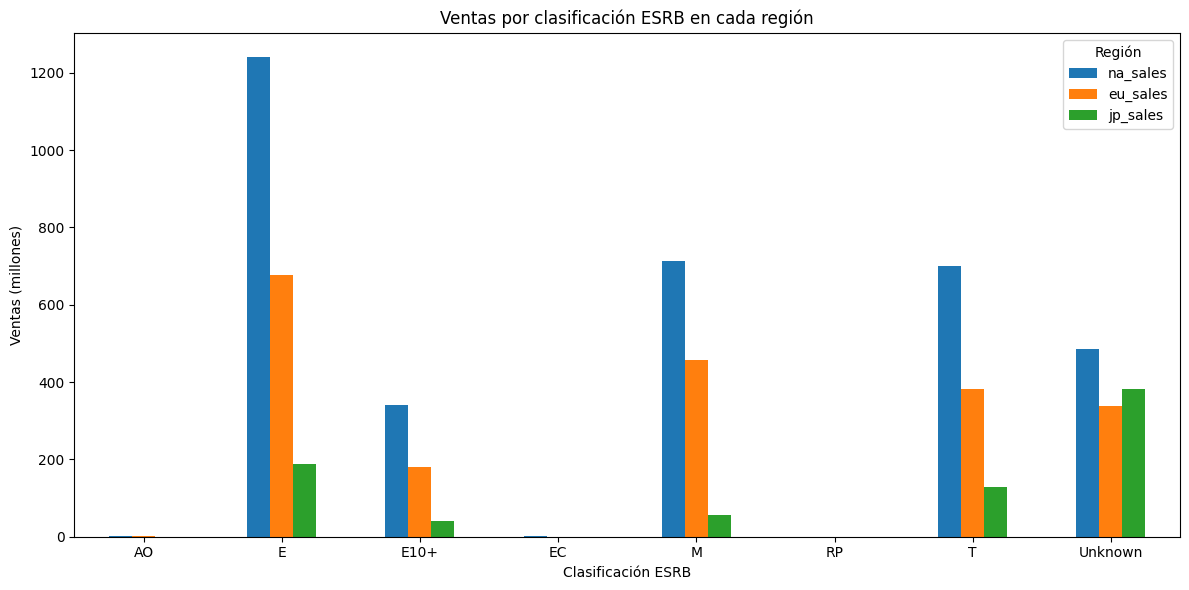

In [94]:
import matplotlib.pyplot as plt

rating_sales = df_model.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().dropna()

rating_sales.plot(kind='bar', figsize=(12,6))
plt.title('Ventas por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


Los juegos clasificados como "E" (Everyone) tienen las mayores ventas en todas las regiones, especialmente en América del Norte. Las clasificaciones "M" (Mature) y "T" (Teen) también venden bien en NA y Europa, pero son menos populares en Japón. Esto indica diferencias culturales en la preferencia por contenido maduro.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has logrado identificar con claridad las diferencias entre América del Norte, Europa y Japón, no solo en cuanto a las plataformas y géneros más populares, sino también considerando el impacto de las clasificaciones ESRB. Este enfoque demuestra tu habilidad para conectar los datos con contextos culturales y patrones de comportamiento, lo cual enriquece significativamente la interpretación del análisis.

</div>

## HIPÓTESIS

### Hipótesis 1: Xbox One vs PC
H₀: Las calificaciones promedio de usuarios para Xbox One y PC son iguales.
H₁: Las calificaciones promedio de usuarios son diferentes.

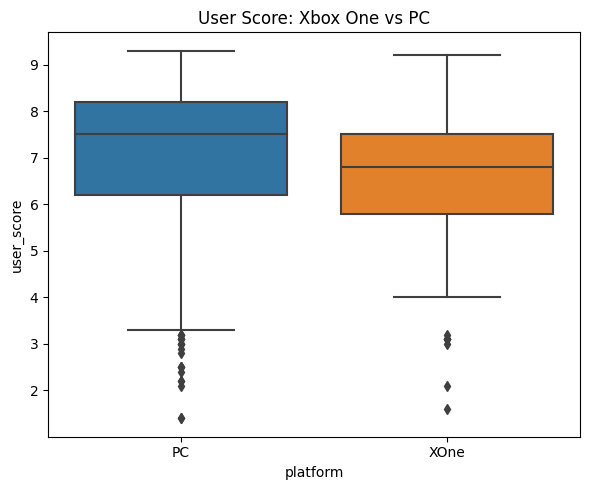

Hipótesis 1: Xbox One vs PC
T-statistic: -4.671, p-value: 0.0000
Conclusión: Rechazamos H₀


In [95]:
from scipy import stats
import matplotlib.pyplot as plt

df_user = df.copy()
df_user['user_score'] = pd.to_numeric(df_user['user_score'], errors='coerce')
df_user = df_user.dropna(subset=['user_score'])

xone_scores = df_user[df_user['platform'] == 'XOne']['user_score']
pc_scores = df_user[df_user['platform'] == 'PC']['user_score']

# Prueba t de diferencia de medias
t1_stat, p1 = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

plt.figure(figsize=(6,5))
sns.boxplot(data=df_user[df_user['platform'].isin(['XOne', 'PC'])], x='platform', y='user_score')
plt.title('User Score: Xbox One vs PC')
plt.tight_layout()
plt.show()

alpha = 0.05
print("Hipótesis 1: Xbox One vs PC")
print(f"T-statistic: {t1_stat:.3f}, p-value: {p1:.4f}")
print("Conclusión:", "Rechazamos H₀" if p1 < alpha else "No se rechaza H₀")


### Hipótesis 2: Acción vs Deportes (género)
H₀: Las calificaciones promedio de usuarios para Action y Sports son iguales.
H₁: Son diferentes.

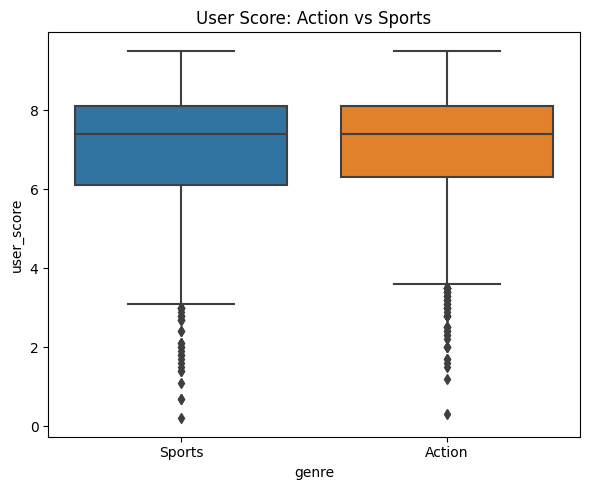

Hipótesis 2: Action vs Sports
T-statistic: 1.789, p-value: 0.0737
Conclusión: No se rechaza H₀


In [97]:
action_scores = df_user[df_user['genre'] == 'Action']['user_score']
sports_scores = df_user[df_user['genre'] == 'Sports']['user_score']

t2_stat, p2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

plt.figure(figsize=(6,5))
sns.boxplot(data=df_user[df_user['genre'].isin(['Action', 'Sports'])], x='genre', y='user_score')
plt.title('User Score: Action vs Sports')
plt.tight_layout()
plt.show()

alpha = 0.05
print("Hipótesis 2: Action vs Sports")
print(f"T-statistic: {t2_stat:.3f}, p-value: {p2:.4f}")
print("Conclusión:", "Rechazamos H₀" if p2 < alpha else "No se rechaza H₀")


Se formularon hipótesis nulas que plantean igualdad en las medias de calificaciones de usuarios entre Xbox One y PC, y entre los géneros de Acción y Deportes. Se usó una prueba t para muestras independientes porque comparamos promedios entre dos grupos no relacionados. Se eligió un valor de significancia de α = 0.05; si el valor p es menor, se rechaza la hipótesis nula, indicando una diferencia significativa.

En la primera hipótesis, se compararon las calificaciones promedio de los usuarios entre Xbox One y PC. El resultado mostró una diferencia estadísticamente significativa, por lo que se rechazó la hipótesis nula. Esto indica que los usuarios de PC tienden a dar puntuaciones distintas (y generalmente más altas) que los de Xbox One, lo cual podría deberse a diferencias en expectativas, catálogo o experiencia de juego.

En la segunda hipótesis, se analizó si existía una diferencia entre las calificaciones promedio de los géneros Acción y Deportes. La prueba no mostró una diferencia significativa, por lo que no se rechazó la hipótesis nula. Esto sugiere que, en general, los usuarios califican de forma similar los juegos de ambos géneros.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has aplicado adecuadamente el método estadístico al justificar el uso de la prueba t y al interpretar los resultados con claridad. Tu explicación de la diferencia significativa entre plataformas refleja una comprensión de cómo factores externos pueden influir en las valoraciones de los usuarios.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto servirá para tener una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

### CONCLUSIONES GENERALES

Las plataformas más rentables para 2017 fueron PS4, Xbox One y 3DS.

Los géneros más comunes fueron Action y Sports.

Japón prefirió juegos de Role-Playing; en NA y Europa dominaron Shooter y Sports.

La clasificación ESRB más vendida fue “E”.

“M” fue popular en NA y EU, pero no en Japón.

Los juegos en PC recibieron mejores calificaciones que en Xbox One.

No hubo diferencia significativa entre las calificaciones de Action y Sports.

Las diferencias regionales y de plataforma afectan tanto ventas como percepción.



<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu resumen final sintetiza de manera clara y ordenada los hallazgos más relevantes del análisis

</div>

### Recomendación general: 
Enfocarse en consolas en crecimiento, géneros exitosos por región y clasificaciones populares para optimizar campañas y desarrollo.